In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

# Part 1

### What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

In [7]:
df["category"].nunique()

296

In [23]:
#sns.histplot(df, "category")
df.head()
top_5 = df["category"].value_counts().head(5).reset_index()
top_5.columns= ["category", "count"]
print(top_5)
# sns.histplot(top_10)
# most popular category by far is sports & Outdoors.

""" 
Top 5 categories are:
                                category   count
0                       Sports & Outdoors  836265
1                                  Beauty   19312
2  Handmade Clothing, Shoes & Accessories   19229
3                             Bath & Body   19092
4                          Birthday Gifts   18978
"""

                                 category   count
0                       Sports & Outdoors  836265
1                                  Beauty   19312
2  Handmade Clothing, Shoes & Accessories   19229
3                             Bath & Body   19092
4                          Birthday Gifts   18978


' \nTop 5 categories are:\n                                category   count\n0                       Sports & Outdoors  836265\n1                                  Beauty   19312\n2  Handmade Clothing, Shoes & Accessories   19229\n3                             Bath & Body   19092\n4                          Birthday Gifts   18978\n'

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.

<Axes: xlabel='category', ylabel='count'>

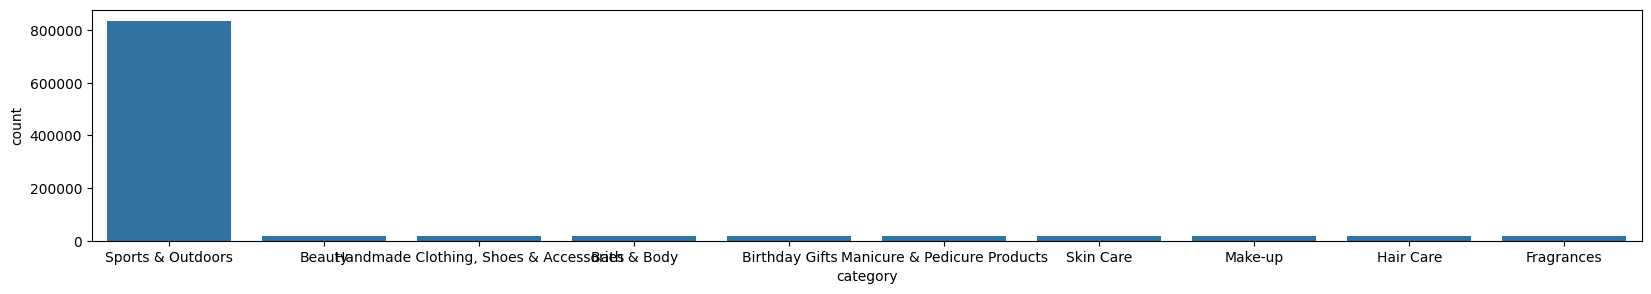

In [58]:
all_counted = df["category"].value_counts().head(10).reset_index()
all_counted.columns= ["category", "count"]

# excluding_top1 = top_5.tail(4)
# excluding_top1['probability'] = excluding_top1['count'] / excluding_top1['count'].sum()
plt.figure(figsize=(20,3))
sns.barplot(data=all_counted, x='category', y='count')
# val_counts = excluding_top1["count"].value_counts()
# val_pct = val_counts / val_counts.sum()
# print(val_pct)
# sns.barplot(x = val_pct.index, y= val_pct.values)

# plt.figure(figsize=(15,3))
# sns.barplot(data=top_5, x='category', y='count')
#plt.ylim(18500, 840000)
#plt.ylim(18500, 19400)
#sns.barplot(data=df, x='category', y='value')
#

For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

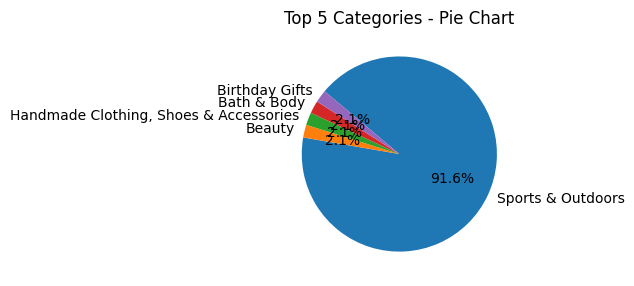

In [61]:
top_5 = df["category"].value_counts().head(5).reset_index()
top_5.columns= ["category", "count"]

# Plot pie chart
plt.figure(figsize=(6, 6)) 
plt.pie(
    top_5['count'],
    labels=top_5['category'],
    autopct='%1.1f%%',
    startangle=140,
    counterclock=False
)
plt.title("Top 5 Categories - Pie Chart")
plt.tight_layout()
plt.show()

# the category Sports & Outdoors dominates with 91,6% 

# Part 2
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

In [68]:
# Calculate the mean, median, and mode for the price of products.
print("mean:" , df["price"].mean())
print("median:" , df["price"].median())
print("mode:" , df["price"].mode())

# mean: 89.24380943923663
# median: 19.09
# mode: 0    9.99



mean: 89.24380943923663
median: 19.09
mode: 0    9.99
Name: price, dtype: float64


In [65]:
# What's the average price point of products listed? How does this compare with the most common price point (mode)?
# average is 89.24
# mode (most common price point) is 9.99
# the average is well above the mode
df["price"].mean()
df["price"].mode()

0    9.99
Name: price, dtype: float64

Determine the variance, standard deviation, range, and interquartile range for product price.

In [71]:
print("var:" , df["price"].var())
print("std:" , df["price"].std())
print("range:" , df["price"].max() -  df["price"].min())
print("IQR:" , df["price"].quantile(0.75) -  df["price"].quantile(0.25))

var: 119445.48532254907
std: 345.60886175349884
range: 100000.0
IQR: 36.0


How varied are the product prices? Are there any indicators of a significant spread in prices?

In [ ]:
# Range: 100000
# This is extremely large, indicating the maximum and minimum prices differ drastically.
# Potential outliers are likely skewing the range — a few very high-priced items may be present.

# Standard Deviation: ~346
# A fairly large std dev means that prices vary a lot from the mean.
# However, it's much smaller than the range, suggesting that most data points aren't close to the extremes.

# 3. IQR: 36
# The middle 50% of product prices lie within a narrow 36-unit band.
# This tells us that most prices are clustered fairly closely together despite the large overall range.

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..

<Axes: xlabel='price', ylabel='count'>

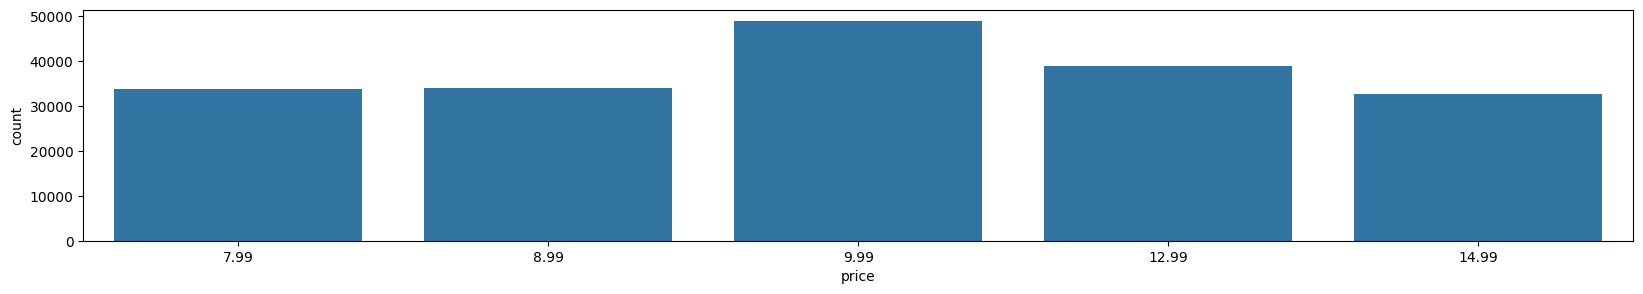

In [93]:
price_count = df["price"].value_counts().head(5).reset_index()
price_count.columns= ["price", "count"]

plt.figure(figsize=(20,3))
# sns.histplot(data=price_count, x='price', y='count')
# the histogram is hard to read - a barplot is much easier to read and solves this issue
sns.barplot(data=price_count, x='price', y='count')


Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

<Axes: xlabel='price'>

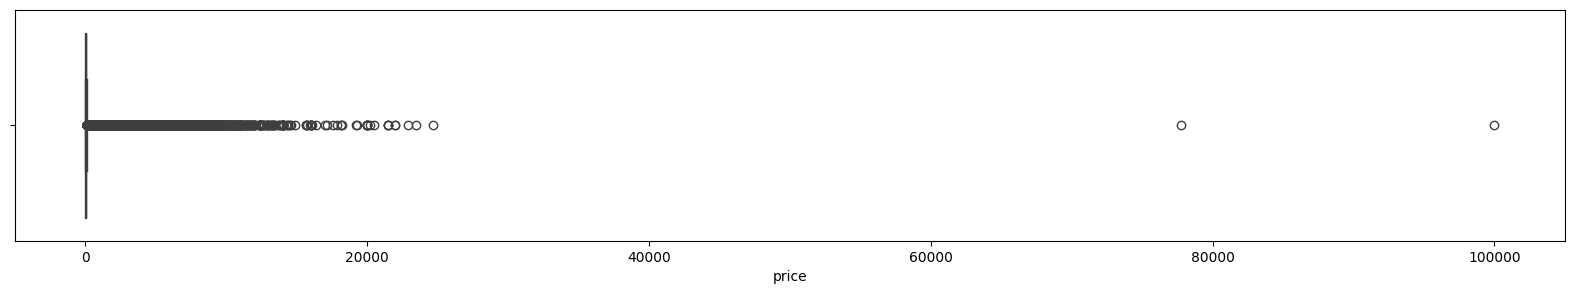

In [95]:

plt.figure(figsize=(20,3))
sns.boxplot(data=df, x='price')

# yes there are several very expensive items and two extreme outliers

# Part 3
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

In [99]:
# Calculate the mean, median, and mode for the rating of products. How do customers generally rate products? Is there a common trend?
# df.head()
print("mean:" , df["stars"].mean())
print("median:" , df["stars"].median())
print("mode:" , df["stars"].mode())
# mean: 2.152836472966065
# median: 0.0
# mode: 0    0.0
# Name: stars, dtype: float64

# customers seem to give relatively bad reviews to the sample products given in this list.
# maybe it would be sensible to ignore 0 stars, because the rating system doesnt allow to give zero stars -> probably no rating given

df_no_zero_stars = df[df["stars"]>0]
print("mean:" , df_no_zero_stars["stars"].mean())
print("median:" , df_no_zero_stars["stars"].median())
print("mode:" , df_no_zero_stars["stars"].mode())

# mean: 4.31916076222691
# median: 4.4
# mode: 0    4.5
# Name: stars, dtype: float64

# without zero star ratings, the customers seem to be happy with the products they boughts


mean: 2.152836472966065
median: 0.0
mode: 0    0.0
Name: stars, dtype: float64
mean: 4.31916076222691
median: 4.4
mode: 0    4.5
Name: stars, dtype: float64


Determine the variance, standard deviation, and interquartile range for product rating.

In [101]:
print("var:" , df_no_zero_stars["stars"].var())
print("std:" , df_no_zero_stars["stars"].std())
print("IQR:" , df_no_zero_stars["stars"].quantile(0.75) -  df_no_zero_stars["stars"].quantile(0.25))

# sdt: Very low standard deviation, which means ratings are tightly clustered around the mean.
# IQR: The middle 50% of product prices lie within a half-unit band — extremely tight clustering. Suggests strong central tendency and very little spread.
# The ratings seem to be consistent and there is a low variation in customer feedback

var: 0.30834337523872835
std: 0.5552867504620729
IQR: 0.5


Calculate the skewness and kurtosis for the rating column.

In [102]:
print("skewedness:" , df_no_zero_stars["stars"].skew())
print("kurtosis:" , df_no_zero_stars["stars"].kurtosis())

# left skew but without the zero values the ratings lean towards higher values

skewedness: -2.3795681122127945
kurtosis: 9.78193769066435


Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


<Axes: xlabel='stars', ylabel='Count'>

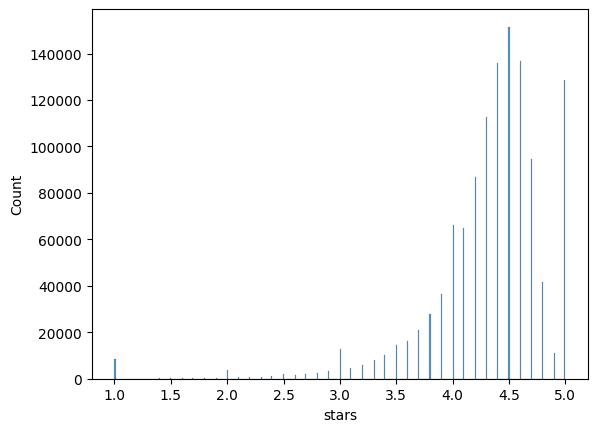

In [103]:
sns.histplot(df_no_zero_stars["stars"])

# numbers close to 4,5 stars and the single 5,0 star rating seem to be most common